# Name: Mohammad Inamul Haq

# Task: 3

# Exploratory Data Analysis-Retail 

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Preprocessing 

In [5]:
df.shape

(9994, 13)

In [6]:
df.size

129922

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# drop the unnecessary columns like postal code which doesn't affect the sales and profit
df.drop(columns="Postal Code", axis=1, inplace=True)
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Data Visualization

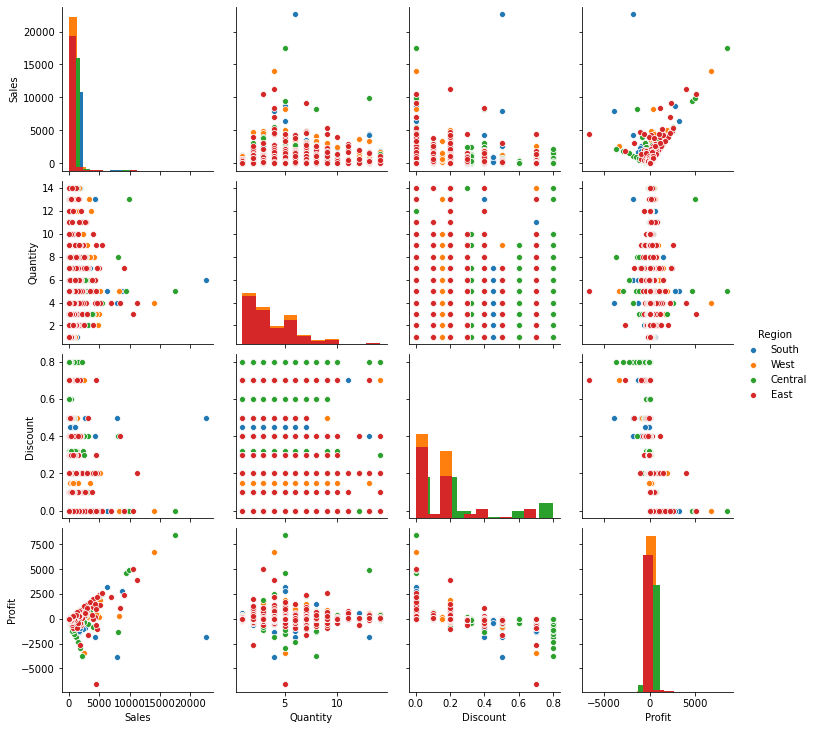

In [19]:
# visualizing the dataset as a whole using the pair plot 
sns.pairplot(df, hue="Region",diag_kind="hist")

<Figure size 720x1152 with 0 Axes>

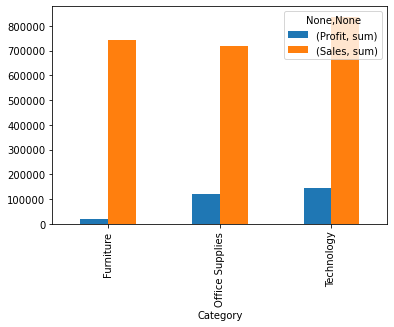

In [10]:
plt.figure(figsize= (10,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

<Figure size 1080x648 with 0 Axes>

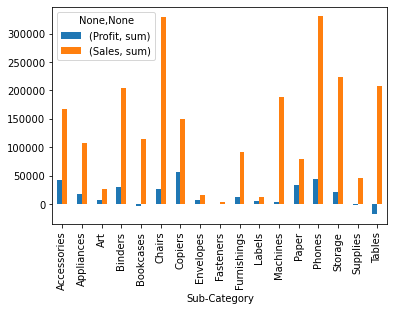

In [11]:
plt.figure(figsize= (15,9))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

In [12]:
corr=df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


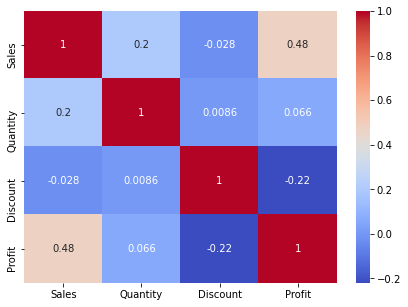

In [31]:
# Correlation matrix
plt.figure(figsize=(7,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Visualizing the Categories

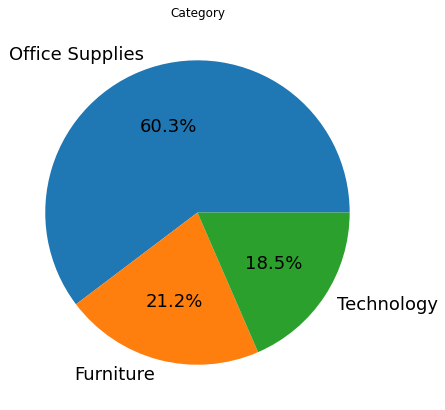

In [23]:
plt.figure(figsize = (7,7))
textprops = {"fontsize":18}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

# Visualizing the Sub-Categories

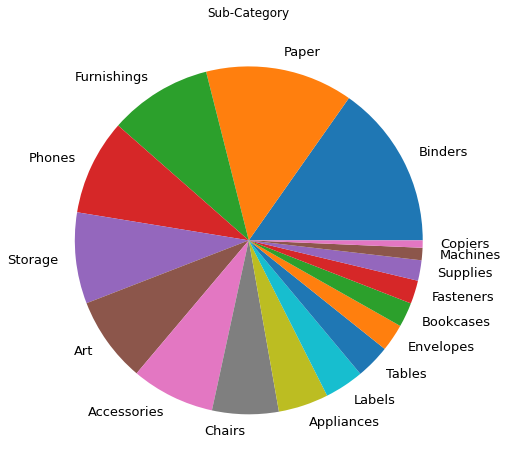

In [25]:
plt.figure(figsize = (8,8))
textprops = {"fontsize":13}
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(), labels=df['Sub-Category'].value_counts().index,textprops = textprops)
plt.show()

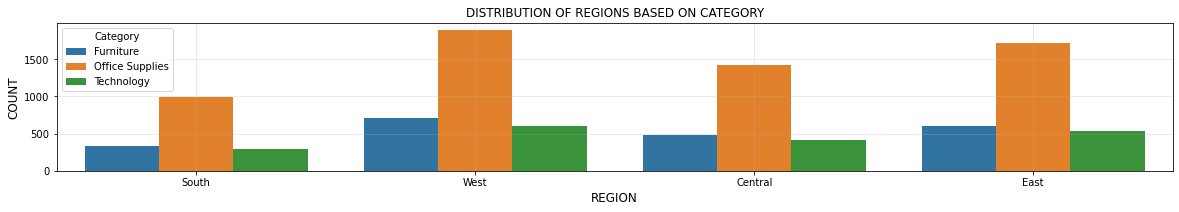

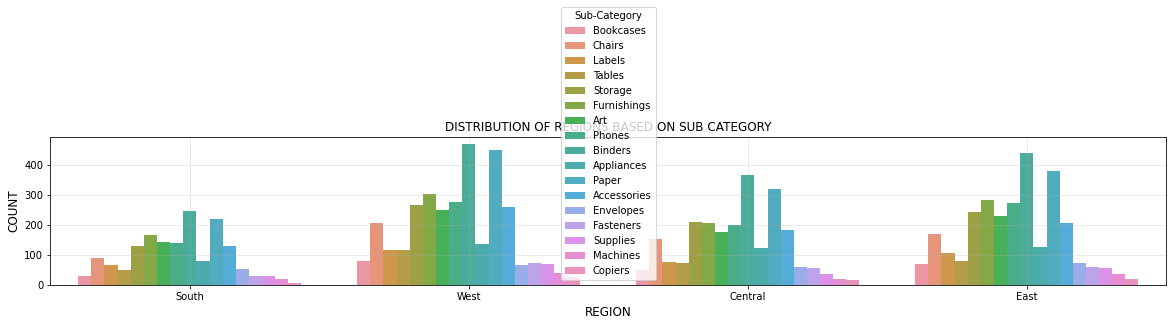

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.countplot('Region',hue='Category',data=df)
plt.title('DISTRIBUTION OF REGIONS BASED ON CATEGORY')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.countplot('Region',hue='Sub-Category',data=df)
plt.title('DISTRIBUTION OF REGIONS BASED ON SUB CATEGORY')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()

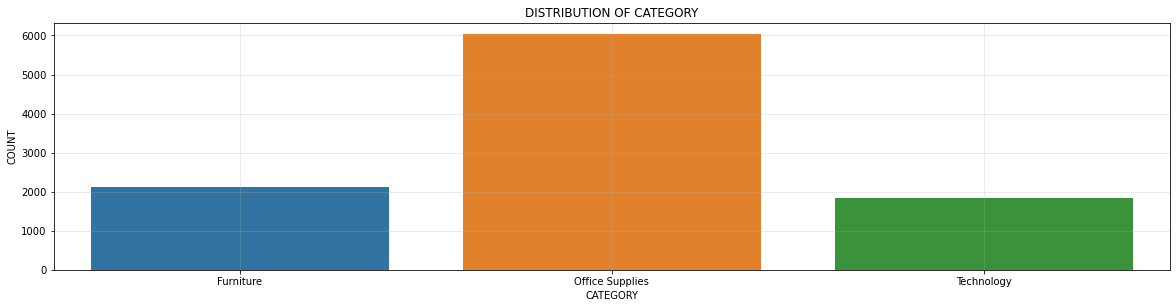

In [15]:
#DISTRIBUTION BASED ON CATEGORY/SUBCATEGORY
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Category',data=df);
plt.title('DISTRIBUTION OF CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)

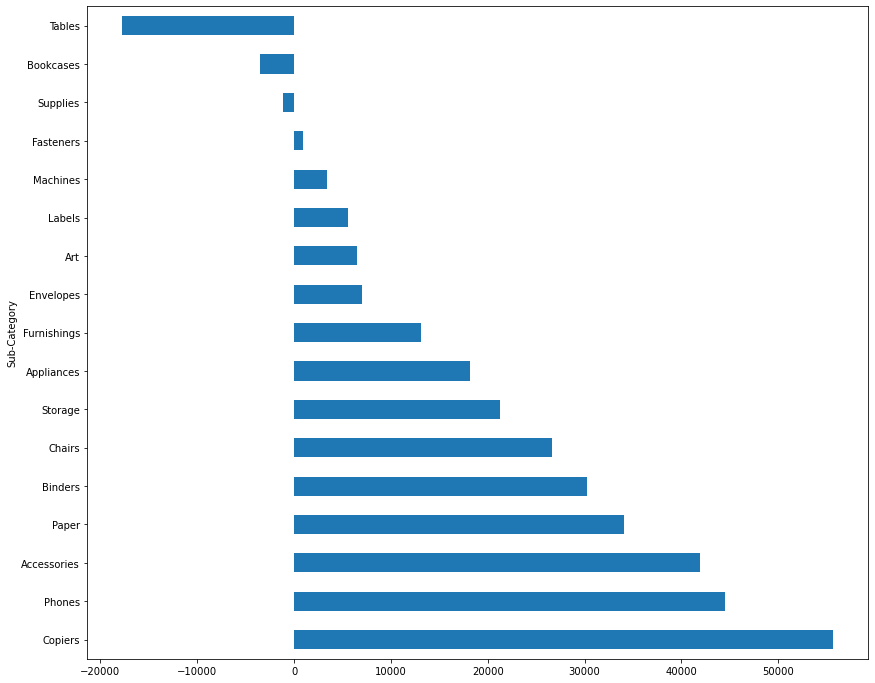

In [26]:
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

# Visualizing the Sales vs Profits in different Regions

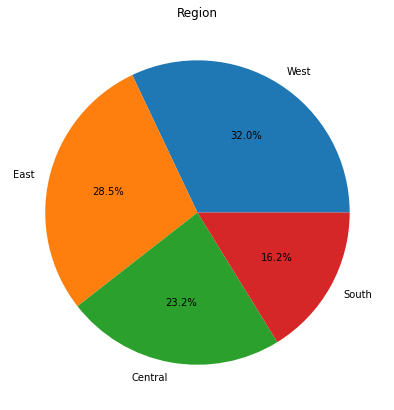

In [28]:
plt.figure(figsize = (7,7))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

# Conclusion:

### 1. We should limit sales of furniture and increase that of technology as furniture has very less profit as compared to sales.

### 2. Considering the sub-categories sales of tables should be minimized.